In [3]:
import os
import numpy as np 
import pandas as pd
from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
dia=pd.read_csv(r"C:\Users\Nikita\Downloads\diabetes.csv")

In [5]:
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# info
# describe( 0.01, 0.02, .03, 0.04, .05, .1,.25,.5, .75, .95, .96,.97, .98,.99)
dia.describe(percentiles=[ 0.01, 0.02, .03, 0.04, .05, .1,.25,.5, .75, .95, .96,.97, .98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,76.000,79.00000,85.000,99.00000,117.0000,140.25000,181.00000,184.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,0.000,38.70000,54.000,62.00000,72.0000,80.00000,90.00000,92.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,23.0000,32.00000,44.00000,45.32000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,30.5000,127.25000,293.00000,325.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.000,21.80000,23.600,27.30000,32.0000,36.60000,44.39500,45.33200,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [7]:
dia[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]]=dia[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace({0:np.nan})

In [8]:
dia.describe(percentiles=[ 0.01, 0.02, .03, 0.04, .05, .1,.25,.5, .75, .95, .96,.97, .98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,95%,96%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,1.00000,3.0000,6.00000,10.00000,11.00000,11.00000,12.00000,13.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,67.62000,72.24000,74.86000,78.000,80.00000,86.200,99.00000,117.0000,141.00000,181.00000,184.00000,188.00000,192.52000,196.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,44.00000,48.00000,50.00000,52.000,52.00000,58.000,64.00000,72.0000,80.00000,92.00000,93.44000,96.00000,100.00000,106.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,10.00000,11.00000,12.00000,12.600,13.00000,16.000,22.00000,29.0000,36.00000,46.00000,47.00000,48.00000,50.00000,53.20000,99.00
Insulin,394.0,155.548223,118.775855,14.000,18.00000,24.72000,36.00000,37.720,41.65000,50.300,76.25000,125.0000,190.00000,395.50000,467.52000,481.05000,514.20000,580.47000,846.00
BMI,757.0,32.457464,6.924988,18.200,19.50000,20.40000,21.10000,21.800,22.20000,24.000,27.50000,32.3000,36.60000,44.50000,45.37600,46.13200,47.76800,51.01200,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.134,0.14035,0.165,0.24375,0.3725,0.62625,1.13285,1.18424,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.000,21.00000,22.000,24.00000,29.0000,41.00000,58.00000,60.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.000,0.00000,0.000,0.00000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [9]:
dia.isnull().sum() 

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
missing=SimpleImputer(strategy="median")
dia_new=missing.fit_transform(dia)

dia_new=pd.DataFrame(dia_new, columns=dia.columns)
dia_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1.0


In [12]:
dia_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# dia_new["Pregnancies"]=np.where(dia_new["Pregnancies"]>=dia_new["Pregnancies"].quantile(.95),dia_new["Pregnancies"].quantile(.95), dia_new["Pregnancies"] )
# dia_new["Pregnancies"]=np.where(dia_new["Pregnancies"]>=dia_new["BloodPressure"].quantile(.95),dia_new["BloodPressure"].quantile(.99), dia_new["BloodPressure"] )

# dia_new["SkinThickness"]=np.where(dia_new["SkinThickness"]>=dia_new["SkinThickness"].quantile(.95),dia_new["SkinThickness"].quantile(.99), dia_new["SkinThickness"] )
# dia_new["Insulin"]=np.where(dia_new["Insulin"]>=dia_new["Insulin"].quantile(.95),dia_new["Insulin"].quantile(.99), dia_new["Insulin"] )
# dia_new["BMI"]=np.where(dia_new["BMI"]>=dia_new["BMI"].quantile(.95),dia_new["BMI"].quantile(.99), dia_new["BMI"] )

def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x 

In [14]:
dia_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:
dia_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]=dia_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']].apply(outliers)

In [16]:
# dia_new

In [17]:
def outliers(x):
    x=x.clip(upper=x.quantile(.95))
#     x=x.clip(lower=x.quantile(.01))
    return x 

In [18]:
dia_new[['Pregnancies']]=dia_new[['Pregnancies']].apply(outliers)

In [19]:
dia_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.742188,3.123898,0.000,1.00000,3.0000,6.00000,10.000
Glucose,768.0,121.738750,30.219440,67.670,99.75000,117.0000,140.25000,196.000
BloodPressure,768.0,72.410156,11.702071,44.000,64.00000,72.0000,80.00000,106.000
SkinThickness,768.0,29.017760,8.298206,10.000,25.00000,29.0000,32.00000,51.330
Insulin,768.0,139.536354,79.286394,24.340,121.50000,125.0000,127.25000,519.900
BMI,768.0,32.406083,6.666875,19.500,27.50000,32.3000,36.60000,50.759
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.420
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.000


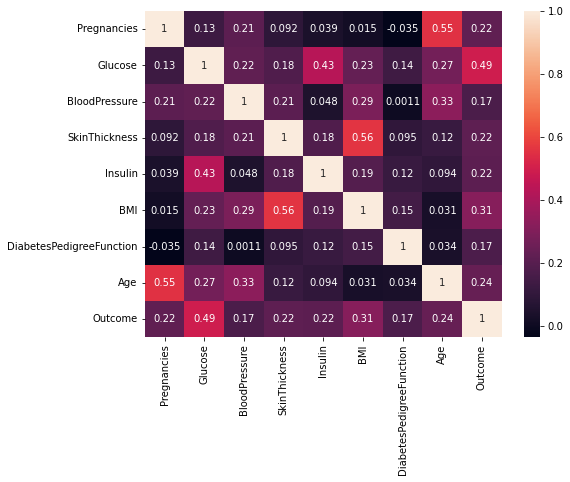

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
cr=dia_new.corr()
import seaborn as sns
sns.heatmap(cr, annot=True)
plt.show() 

In [21]:
y=dia_new["Outcome"]
x=dia_new.drop(columns=["Outcome"])

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3, random_state=1)

In [23]:
sv1=svm.SVC()
sv1.fit(x_train, y_train)
print("train score", sv1.score(x_train, y_train))
print("test score", sv1.score(x_test, y_test))

train score 0.7523277467411545
test score 0.7705627705627706


In [24]:
sv1=svm.SVC(kernel="linear")
sv1.fit(x_train, y_train)
print("train score", sv1.score(x_train, y_train))
print("test score", sv1.score(x_test, y_test))

train score 0.7635009310986964
test score 0.7792207792207793


In [25]:
sv1=svm.SVC(kernel="poly", degree=4)
sv1.fit(x_train, y_train)
print("train score", sv1.score(x_train, y_train))
print("test score", sv1.score(x_test, y_test))

train score 0.770949720670391
test score 0.7835497835497836


In [26]:
sv1=svm.SVC(kernel="rbf", gamma=0.0001)
sv1.fit(x_train, y_train)
print("train score", sv1.score(x_train, y_train))
print("test score", sv1.score(x_test, y_test))

train score 0.7672253258845437
test score 0.7748917748917749


In [27]:
from sklearn.model_selection import GridSearchCV


In [ ]:
params={"kernel":["linear", "rbf", "poly"],
       "C":[.1, 1,10],
       "gamma":[0.0001, 0.001, 0.01]}
sv=svm.SVC()
gsv=GridSearchCV(sv, param_grid=params, n_jobs=-1, cv=5, verbose=2)
gsv.fit(x_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
